In [54]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns



In [55]:
# Read in data
ratings=pd.read_csv(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Take a look at the data
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [57]:
# Number of users
print('The ratings dataset has', ratings['UserID'].nunique(), 'unique users')

The ratings dataset has 6040 unique users


In [58]:
# Number of movies
print('The ratings dataset has', ratings['MovieID'].nunique(), 'unique movies')

The ratings dataset has 3706 unique movies


In [59]:
# Number of ratings
print('The ratings dataset has', ratings['Rating'].nunique(), 'unique ratings')

The ratings dataset has 5 unique ratings


In [60]:
# List of unique ratings
print('The unique ratings are', sorted(ratings['Rating'].unique()))

The unique ratings are [1, 2, 3, 4, 5]


In [61]:
# Define the column names for the DataFrame
column_names = ['MovieID', 'Title', 'Genres']

# Read the .dat file into a DataFrame
movies = pd.read_csv(r'C:\Users\ASUS\Downloads\ml-1m\ml-1m\movies.dat', sep='::', engine='python', header=None, names=column_names)

# Take a look at the data
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='MovieID', how='inner')
# Take a look at the data
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama



###### Exploratory Data Analysis (EDA)

Calculating the mean rating and the count of ratings for each movie

In [63]:
# Aggregate by movie
agg_ratings = df.groupby('Title').agg(mean_rating = ('Rating', 'mean'),
                                                number_of_ratings = ('Rating', 'count')).reset_index()

By filtering to keep only movies with over 100 ratings, we're essentially focusing our analysis on a subset of movies that are more statistically reliable and potentially more influential in the context of audience preferences and behavior.

In [64]:
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 3 to 3705
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2006 non-null   object 
 1   mean_rating        2006 non-null   float64
 2   number_of_ratings  2006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 62.7+ KB


In [65]:
# Check popular movies.
#The code sorts by the number of ratings in descending order and displays the top entries.

agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()


,Title,mean_rating,number_of_ratings
127,American Beauty (1999),4.317386,3428
3153,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
1789,Jurassic Park (1993),3.763847,2672


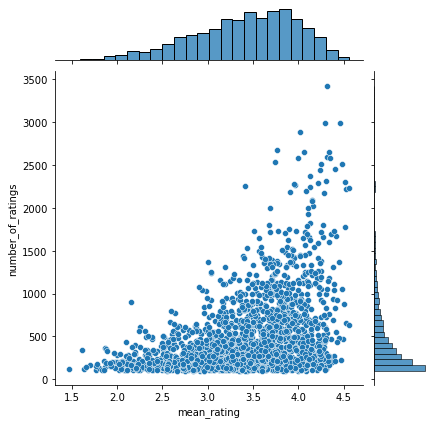

In [66]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

#####  Main Scatter Plot:
The main part of the plot shows a scatter plot of the data points. Each point represents a movie.
The scatter plot allows us to see the relationship between the mean rating and the number of ratings for each movie.

We can see an upward trend from the scatter plot, showing that popular movies get higher ratings.

##### Marginal Histograms:
Along the top margin, there is a histogram showing the distribution of mean ratings.
Along the right margin, there is a histogram showing the distribution of the number of ratings.
These histograms provide additional context by showing the distribution of each individual variable.


The average rating distribution shows that most movies in the dataset have an average rating of around 4.

The number of rating distribution shows that most movies have less than 500 ratings.

To keep only the 2006 movies with more than 100 ratings, we need to join the movie with the user-rating level dataframe.

`how='inner'` and `on='title'` ensure that only the movies with more than 100 ratings are included.

In [67]:
# Merge data
df_GT100 = pd.merge(df, agg_ratings_GT100[['Title']], on='Title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940925 entries, 0 to 940924
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     940925 non-null  int64 
 1   MovieID    940925 non-null  int64 
 2   Rating     940925 non-null  int64 
 3   Timestamp  940925 non-null  int64 
 4   Title      940925 non-null  object
 5   Genres     940925 non-null  object
dtypes: int64(4), object(2)
memory usage: 50.3+ MB


In [68]:
# Number of users
print('The ratings dataset has', df_GT100['UserID'].nunique(), 'unique users')

The ratings dataset has 6040 unique users


In [69]:
#Number of movies
print('The ratings dataset has', df_GT100['MovieID'].nunique(), 'unique movies')


The ratings dataset has 2006 unique movies


In [70]:
# Number of ratings
print('The ratings dataset has', df_GT100['Rating'].nunique(), 'unique ratings')


The ratings dataset has 5 unique ratings


In [71]:
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['Rating'].unique()))


The unique ratings are [1, 2, 3, 4, 5]


######  Create User-Movie Matrix

In [72]:
# Create user-item matrix
matrix = df_GT100.pivot_table(index='UserID', columns='Title', values='Rating')

matrix.head()

Title,"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",...,Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Zero Effect (1998),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Data Normalization

###### Mathematical Formula:
$$ \text{matrix_norm}_{ij} = \text{matrix}_{ij} - \bar{r}_i $$


Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

After normalization, the movies with a rating less than the user's average rating get a negative value, and the movies with a rating more than the user's average rating get a positive value.

In [73]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()


Title,"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",...,Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Zero Effect (1998),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.06,0.06,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


######  Identify Similar Users

$ \text{Pearson}(u_i, u_j)$ = $$\frac{{\sum_{k} (r_{ik} - \bar{r}_i) \cdot (r_{jk} - \bar{r}_j)}}{{\sqrt{\sum_{k} (r_{ik} - \bar{r}_i)^2} \cdot \sqrt{\sum_{k} (r_{jk} - \bar{r}_j)^2}}} $$

\[$ S_{ij} = \text{Pearson}(u_i, u_j) $\]


In [74]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.416667,-0.332182,0.333333,-0.172516,0.219956,NaN,-0.583333,3.305715e-01,-0.057363,...,-0.160128,7.559289e-01,1.000000,NaN,0.381246,-0.201132,-4.517540e-01,NaN,0.056857,-0.043519
2,0.416667,1.000000,0.236834,-0.118678,-0.208333,-0.061859,0.154303,0.024968,2.051123e-01,-0.091578,...,-0.709299,9.083405e-02,0.301309,NaN,0.413063,0.377852,3.081451e-01,-0.500000,0.572078,-0.027143
3,-0.332182,0.236834,1.000000,0.840168,-0.437621,-0.349215,0.790569,-0.528594,-3.204938e-17,0.009305,...,-0.395285,-9.759001e-02,-0.711556,NaN,0.427001,0.204619,1.065328e-17,0.500000,0.309277,-0.395285
4,0.333333,-0.118678,0.840168,1.000000,0.000000,NaN,-0.207514,0.534522,5.222330e-01,-0.270501,...,-0.645497,2.266233e-17,-0.078598,NaN,-0.013558,0.467447,-1.132277e-01,-1.000000,0.000000,0.450323
5,-0.172516,-0.208333,-0.437621,0.000000,1.000000,-0.592014,-0.028516,0.218130,-1.538216e-17,-0.023582,...,0.260875,7.071068e-01,0.116775,0.5,0.539112,0.181292,-9.713482e-02,-0.928571,1.000000,0.322159


Using user ID 1 to find similar users.

We first need to exclude user ID 1 from the similar user list and decide the number of similar users.

In [75]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
2,0.416667,1.000000,0.236834,-0.118678,-0.208333,-0.061859,0.154303,0.024968,2.051123e-01,-0.091578,...,-0.709299,9.083405e-02,0.301309,NaN,0.413063,0.377852,3.081451e-01,-0.500000,0.572078,-0.027143
3,-0.332182,0.236834,1.000000,0.840168,-0.437621,-0.349215,0.790569,-0.528594,-3.204938e-17,0.009305,...,-0.395285,-9.759001e-02,-0.711556,NaN,0.427001,0.204619,1.065328e-17,0.500000,0.309277,-0.395285
4,0.333333,-0.118678,0.840168,1.000000,0.000000,NaN,-0.207514,0.534522,5.222330e-01,-0.270501,...,-0.645497,2.266233e-17,-0.078598,NaN,-0.013558,0.467447,-1.132277e-01,-1.000000,0.000000,0.450323
5,-0.172516,-0.208333,-0.437621,0.000000,1.000000,-0.592014,-0.028516,0.218130,-1.538216e-17,-0.023582,...,0.260875,7.071068e-01,0.116775,0.5,0.539112,0.181292,-9.713482e-02,-0.928571,1.000000,0.322159
6,0.219956,-0.061859,-0.349215,NaN,-0.592014,1.000000,0.866025,-0.590932,-2.374290e-01,0.324967,...,-0.693375,8.062258e-01,NaN,NaN,-0.385922,-0.318681,-2.721655e-01,-0.866025,-0.464973,0.056622


In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

n = 10 means we would like to pick the top 10 most similar users for user ID 1.

The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value.

In [76]:
# Number of similar users
n = 10

In [77]:
# User similarity threashold
user_similarity_threshold = 0.3

In [78]:
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]


####picked_userID

In [79]:
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are UserID
4991    1.0
4339    1.0
3111    1.0
526     1.0
5043    1.0
4487    1.0
1065    1.0
562     1.0
565     1.0
4537    1.0
Name: 1, dtype: float64


######  Narrow Down Item Pool

In step 7, we will narrow down the item pool by doing the following:
1. Remove the movies that have been watched by the target user (user ID 1).
2. Keep only the movies that similar users have watched.

To remove the movies watched by the target user, we keep only the row for `userID=1` in the user-item matrix and remove the items with missing values.

In [80]:
# Remove movies that have been watched
picked_userid_watched = matrix_norm[matrix_norm.index == 1].dropna(axis=1, how='all')
picked_userid_watched

Title,Airplane! (1980),Aladdin (1992),Antz (1998),Apollo 13 (1995),Awakenings (1990),Back to the Future (1985),Bambi (1942),Beauty and the Beast (1991),Ben-Hur (1959),Big (1988),...,Snow White and the Seven Dwarfs (1937),"Sound of Music, The (1965)",Star Wars: Episode IV - A New Hope (1977),Tarzan (1999),Titanic (1997),To Kill a Mockingbird (1962),Toy Story (1995),Toy Story 2 (1999),Wallace & Gromit: The Best of Aardman Animation (1996),"Wizard of Oz, The (1939)"
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.192308,-0.192308,-0.192308,0.807692,0.807692,0.807692,-0.192308,0.807692,0.807692,-0.192308,...,-0.192308,0.807692,-0.192308,-1.192308,-0.192308,-0.192308,0.807692,-0.192308,-1.192308,-0.192308


To keep only the similar users' movies, we keep the user IDs in the top 10 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.


In [81]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

Title,10 Things I Hate About You (1999),101 Dalmatians (1996),"20,000 Leagues Under the Sea (1954)",28 Days (2000),"7th Voyage of Sinbad, The (1958)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Robin Hood, The (1938)",...,Wes Craven's New Nightmare (1994),What About Bob? (1991),When Harry Met Sally... (1989),While You Were Sleeping (1995),White Men Can't Jump (1992),William Shakespeare's Romeo and Juliet (1996),"World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),You've Got Mail (1998)
UserID,,,,,,,,,,,,,,,,,,,,,
526,NaN,NaN,NaN,NaN,-0.892857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.560000,NaN
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.282051,NaN,0.282051,NaN,-1.717949,NaN,-1.717949
3111,0.745455,-0.254545,-0.254545,NaN,NaN,1.745455,1.745455,-2.254545,-2.254545,NaN,...,NaN,NaN,NaN,1.745455,-2.254545,NaN,-0.254545,NaN,NaN,NaN
4339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.369231,NaN,1.369231,NaN
4487,NaN,NaN,NaN,-0.62069,NaN,1.379310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.379310,NaN,NaN,NaN
4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.16,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we will drop the movies that user ID 1 watched from the similar user movie list. errors='ignore' drops columns if they exist without giving an error message.

In [82]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

In [83]:
# Take a look at the data
similar_user_movies

Title,10 Things I Hate About You (1999),101 Dalmatians (1996),"20,000 Leagues Under the Sea (1954)",28 Days (2000),"7th Voyage of Sinbad, The (1958)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Robin Hood, The (1938)",...,Wes Craven's New Nightmare (1994),What About Bob? (1991),When Harry Met Sally... (1989),While You Were Sleeping (1995),White Men Can't Jump (1992),William Shakespeare's Romeo and Juliet (1996),"World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),You've Got Mail (1998)
UserID,,,,,,,,,,,,,,,,,,,,,
526,NaN,NaN,NaN,NaN,-0.892857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.560000,NaN
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.282051,NaN,0.282051,NaN,-1.717949,NaN,-1.717949
3111,0.745455,-0.254545,-0.254545,NaN,NaN,1.745455,1.745455,-2.254545,-2.254545,NaN,...,NaN,NaN,NaN,1.745455,-2.254545,NaN,-0.254545,NaN,NaN,NaN
4339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.369231,NaN,1.369231,NaN
4487,NaN,NaN,NaN,-0.62069,NaN,1.379310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.379310,NaN,NaN,NaN
4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.16,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Recommend Items

In following code we are deciding which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [84]:
# A dictionary to store item scores
item_score = {}

In [85]:
# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

In [86]:
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])


In [87]:
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)


In [101]:

# Select top m movies
m = 15
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
172,"Hurricane, The (1999)",1.745455,5.937762
46,Big Daddy (1999),1.745455,5.937762
69,Can't Hardly Wait (1998),1.745455,5.937762
106,Dumb & Dumber (1994),1.745455,5.937762
200,Liar Liar (1997),1.745455,5.937762
30,Austin Powers: International Man of Mystery (1...,1.745455,5.937762
91,Dazed and Confused (1993),1.745455,5.937762
326,"Story of Us, The (1999)",1.745455,5.937762
260,Patch Adams (1998),1.745455,5.937762
232,Multiplicity (1996),1.745455,5.937762


###### Predict Scores

If the goal is to predict the user's rating, we need to add the user's average movie rating score back to the movie score.

In [102]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == 1].T.mean()[picked_userid]

In [103]:
# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')


The average movie rating for user 1 is 4.19


In [104]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

In [105]:
# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
172,"Hurricane, The (1999)",1.745455,5.937762
46,Big Daddy (1999),1.745455,5.937762
69,Can't Hardly Wait (1998),1.745455,5.937762
106,Dumb & Dumber (1994),1.745455,5.937762
200,Liar Liar (1997),1.745455,5.937762
30,Austin Powers: International Man of Mystery (1...,1.745455,5.937762
91,Dazed and Confused (1993),1.745455,5.937762
326,"Story of Us, The (1999)",1.745455,5.937762
260,Patch Adams (1998),1.745455,5.937762
232,Multiplicity (1996),1.745455,5.937762


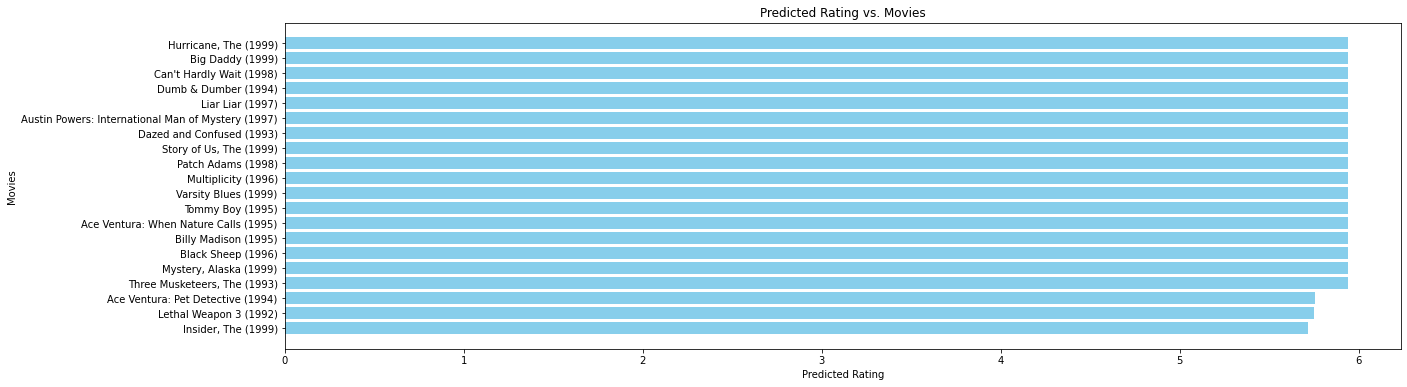

In [108]:
import matplotlib.pyplot as plt

# Plot graph
plt.figure(figsize=(20, 6))
plt.barh(ranked_item_score['movie'][:20], ranked_item_score['predicted_rating'][:20], color='skyblue')
plt.xlabel('Predicted Rating')
plt.ylabel('Movies')
plt.title('Predicted Rating vs. Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display top recommendations at the top
plt.show()
